In [1]:
import numpy as np
import gym
from gym import spaces
from gym.utils import seeding
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from blackjack_env import blackjack_game
from monte_carlo_agent import monte_carlo_policy_iteration
%matplotlib inline

In [2]:
game = blackjack_game()

In [3]:
policy = lambda x: 1 - int(x >= 20)

In [4]:
mc_ = monte_carlo_policy_iteration(200, blackjack_game, 1)

In [5]:
val_func = mc_.first_visit_MC_prediction(policy, 10000)

In [6]:
# plot_value_function exclusive credit to Denny Britz
import matplotlib
def plot_value_function(V, title="Value Function"):
    """
    Plots the value function as a surface plot.
    """
    min_x = min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    # Find value for all (x, y) coordinates
    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))

    def plot_surface(X, Y, Z, title):
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player Sum')
        ax.set_ylabel('Dealer Showing')
        ax.set_zlabel('Value')
        ax.set_title(title)
        ax.view_init(ax.elev, -120)
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "{} (No Usable Ace)".format(title))
    plot_surface(X, Y, Z_ace, "{} (Usable Ace)".format(title))

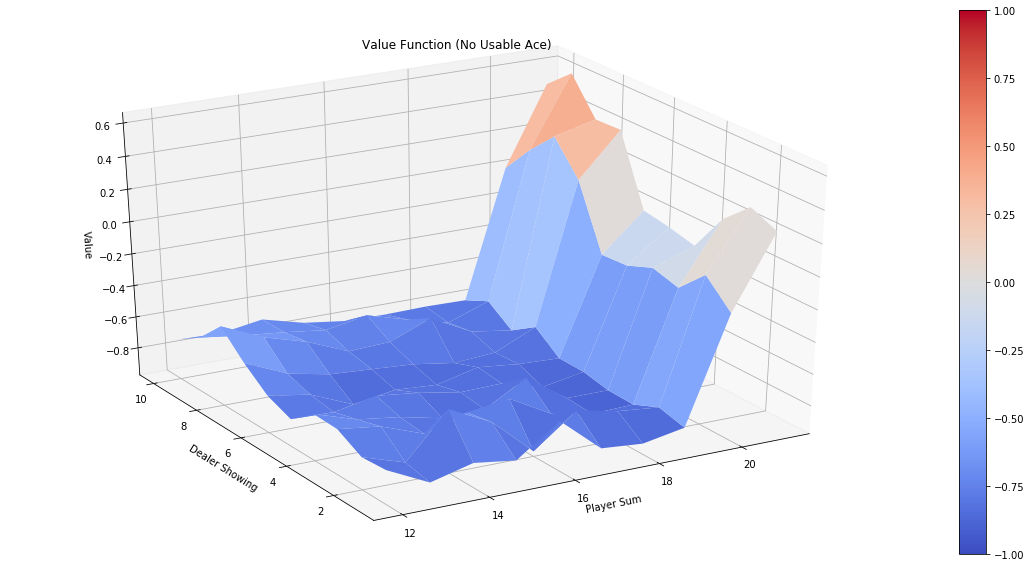

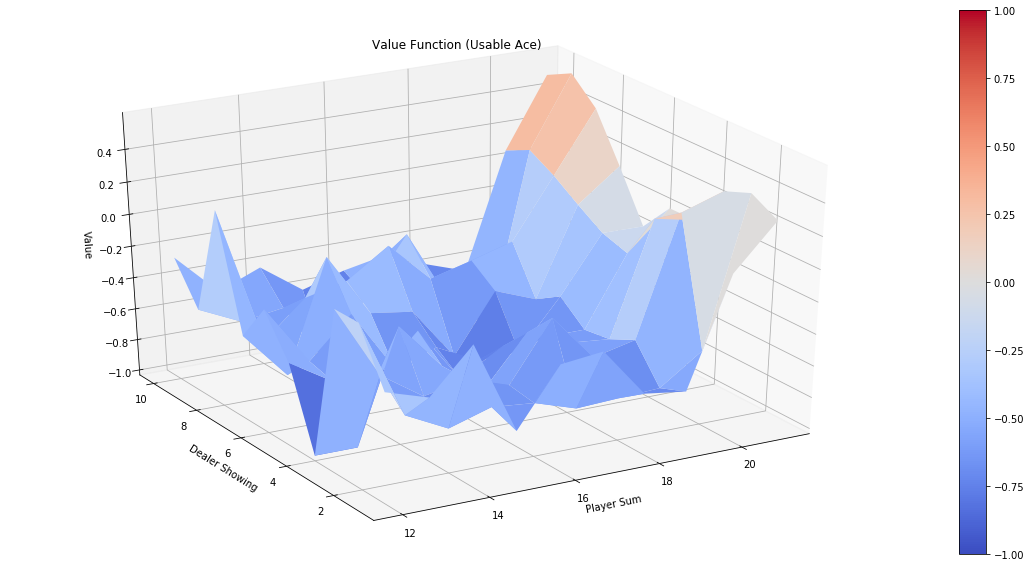

In [7]:
plot_value_function(val_func)

In [ ]:
val_func_500 = mc_.first_visit_MC_prediction(policy, 500000)

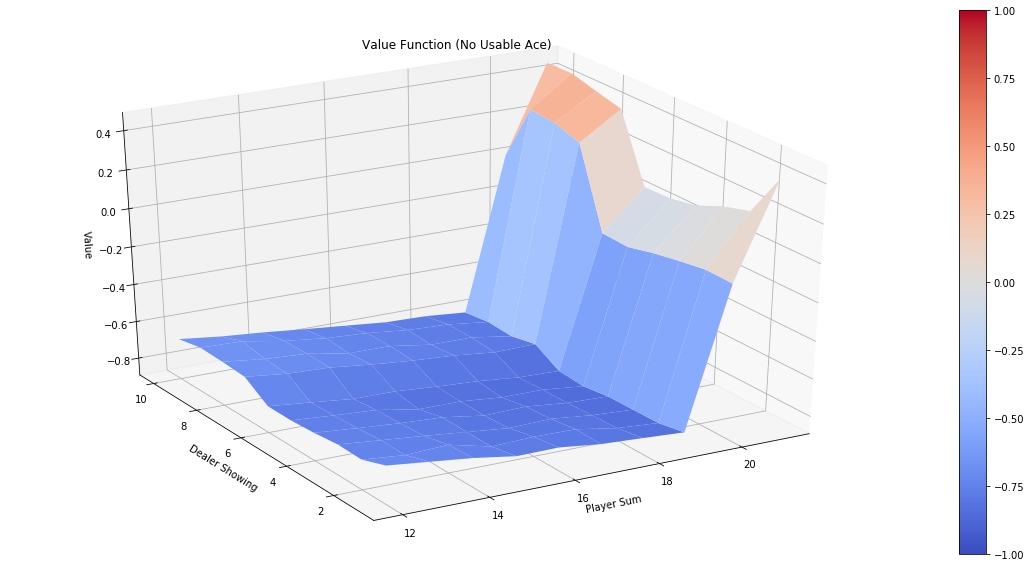

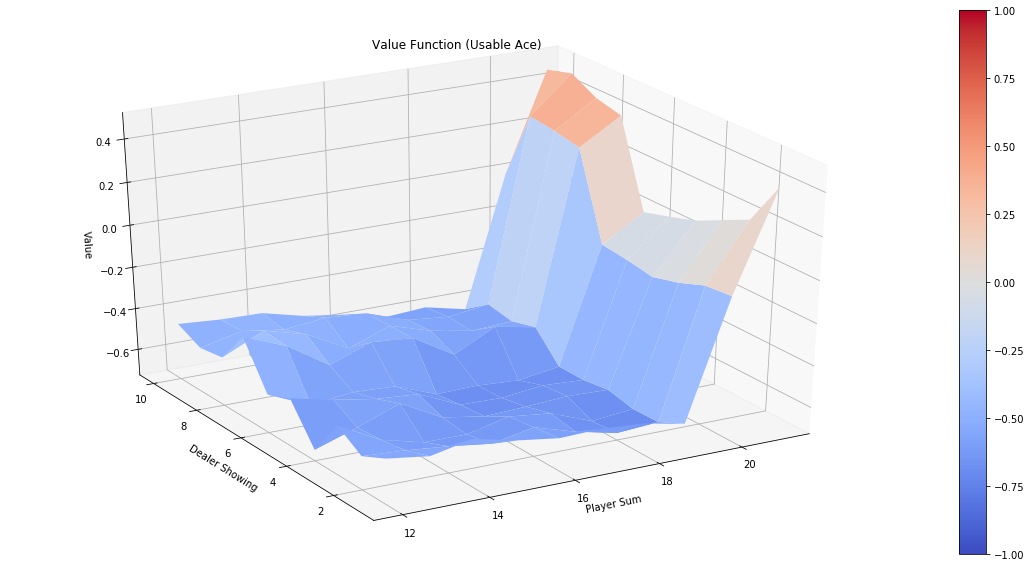

In [14]:
plot_value_function(val_func_500)

In [11]:
q, policy_ = mc_.state_action_MC_control(1e8, .1)

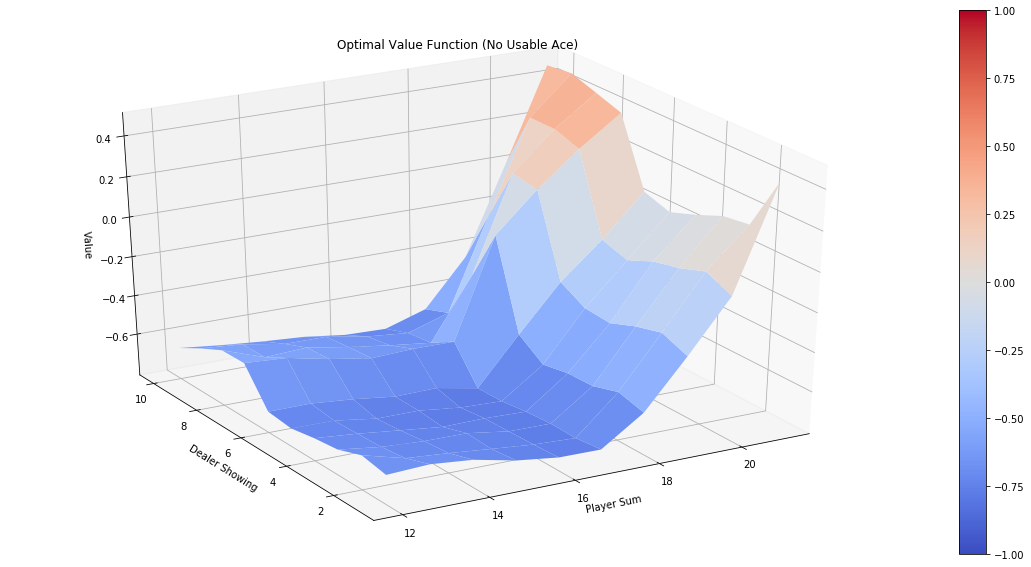

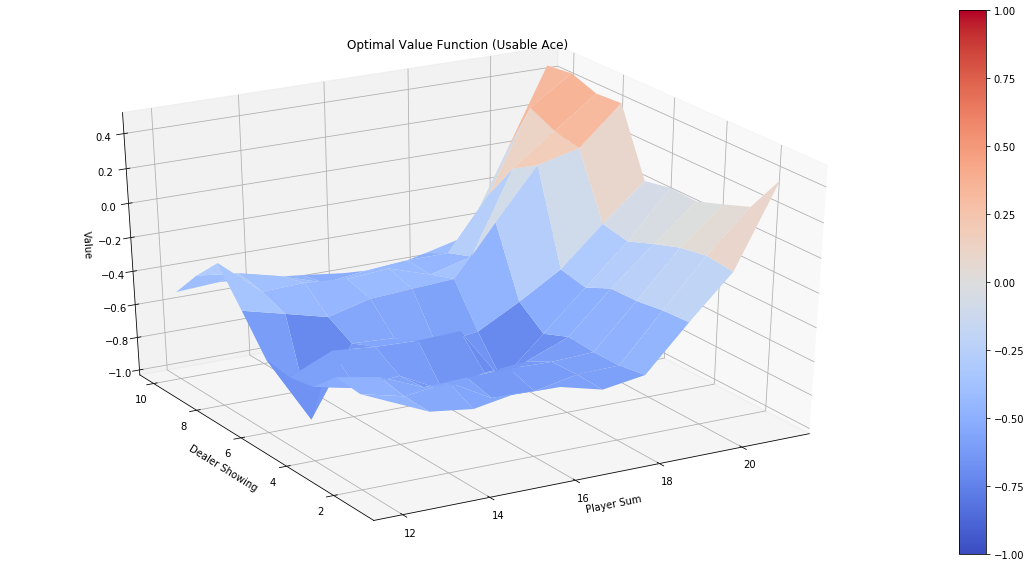

In [12]:
V = defaultdict(float) 
for state, actions in q.items():
    action_value = np.max(actions)
    V[state] = action_value
plot_value_function(V, title="Optimal Value Function")

In [8]:
blckjck = blackjack_game()
blckjck._reset()

(16, 2, 0)

In [10]:
q_, q_wr, q_wr_10, p_, p_wr, p_wr_10 = mc_.state_action_MC_control(int(1e7), .1)

Time elapsed to  0 iterations:  0.0005898475646972656
Time elapsed to  100000 iterations:  73.57235884666443
Time elapsed to  200000 iterations:  118.82634592056274
Time elapsed to  300000 iterations:  155.65231490135193
Time elapsed to  400000 iterations:  192.9986367225647
Time elapsed to  500000 iterations:  229.23283314704895
Time elapsed to  600000 iterations:  265.3747479915619
Time elapsed to  700000 iterations:  301.76938796043396
Time elapsed to  800000 iterations:  337.871111869812
Time elapsed to  900000 iterations:  373.9727051258087
Time elapsed to  1000000 iterations:  411.19749999046326
Time elapsed to  1100000 iterations:  455.7488148212433
Time elapsed to  1200000 iterations:  493.246484041214
Time elapsed to  1300000 iterations:  529.4699940681458
Time elapsed to  1400000 iterations:  565.4417660236359
Time elapsed to  1500000 iterations:  601.8104729652405
Time elapsed to  1600000 iterations:  638.2127869129181
Time elapsed to  1700000 iterations:  674.2549469470978


KeyboardInterrupt: 

In [11]:
x = np.arange(0, 1000000, 100000)
plt.plot(x, q_wr, label='Action-value function')
plt.plot(x, p_wr, label='Policy')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Win rate')
plt.title('MC Player win rate against dealer throughout training')
plt.legend()
plt.show()

NameError: name 'q_wr' is not defined

In [15]:
max(q_wr)

NameError: name 'q_wr' is not defined

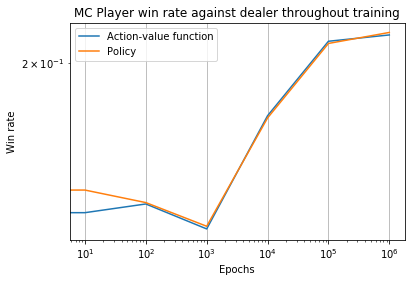

In [109]:
x_log = np.array([0, 10, 100, 1000, 10000, 100000, 1000000])
plt.loglog(x_log, q_wr_10, label='Action-value function')
plt.loglog(x_log, p_wr_10, label='Policy')
plt.xlabel('Epochs')
plt.ylabel('Win rate')
plt.grid()
plt.title('MC Player win rate against dealer throughout training')
plt.legend()
plt.show()

100000000.0